In [1]:
import subprocess
import sys
import nibabel as nib
import numpy as np
import matplotlib.pyplot as plt
import pydicom
from matplotlib import pyplot
import nrrd
import shutil
import os

In [2]:
directory_in=r'C:\Users\marin\OneDrive - Universitat de Barcelona\Marina\UNI\5e any\Adrian\final_codes\Dades_In'
directory_out=r'C:\Users\marin\OneDrive - Universitat de Barcelona\Marina\UNI\5e any\Adrian\final_codes\Dades_Out'
directory_nifti=r'C:\Users\marin\OneDrive - Universitat de Barcelona\Marina\UNI\5e any\Adrian\final_codes\Dades_NIFTI'

path_mascara=r'C:\Users\marin\OneDrive - Universitat de Barcelona\Marina\UNI\5e any\TGD14_90_min_Brain_segmentation.nii'

In [14]:
directory_in_canon=r'C:\Users\marin\dcm_qa_canon\In'
directory_out_canon=r'C:\Users\marin\dcm_qa_canon\Out'


path_batch=r'C:\Users\marin\dcm_qa_canon\batch.sh'

directory_dicom_crani=r'C:\Users\marin\OneDrive - Universitat de Barcelona\Marina\UNI\5e any\PERFUSIONT2(AP)'
directory_dicom_sensecrani=r'C:\Users\marin\OneDrive - Universitat de Barcelona\Marina\UNI\5e any\PERFUSIONT2(AP)_sensecrani'

name_dicom_final1=os.listdir(directory_dicom_crani)[0][0:-7]
name_dicom_final2=os.listdir(directory_dicom_crani)[0][0:-8]



In [4]:
directory=os.listdir(directory_in)

path_newfolder=os.path.join(directory_in_canon,directory[0])
list_in_canon=os.listdir(directory_in_canon)

if not list_in_canon: #Quan una llista esta buida = false, si posem if not, es torna true i per tant es fa el que posa a dins dell if not
    
    os.mkdir(path_newfolder) #(nomes es pot fer una vegada, un cop un directori ja esta creat no es pot tornar a crear)
    
else:
    print('The folder already exists')
    

The folder already exists


In [6]:
directory_newfolder=os.listdir(path_newfolder)
dir_in=os.listdir(directory_in)


if not directory_newfolder:
    print('Folder empty') #Folder empty
    
    shutil.copytree(os.path.join(directory_in,dir_in[0]),path_newfolder,dirs_exist_ok=True) #Copiem la imatge
    
else:
    print('Folder full')
    

Folder full


#### Convertim dicom a nifti

Fem run des d'aquí a batch.sh

In [12]:
subprocess.run(path_batch, shell=True)

CompletedProcess(args='C:\\Users\\marin\\dcm_qa_canon\\batch.sh', returncode=0)

In [15]:
path_nifti=os.path.join(directory_out_canon, os.listdir(directory_out_canon)[1])#El [] és .json
path_new_nifti=os.path.join(directory_nifti,os.listdir(directory_out_canon)[1]) 

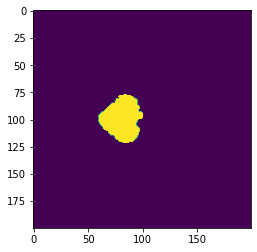

In [17]:
#Pugem la màscara
mascara=nib.load(path_mascara)
image_mascara=mascara.get_fdata()
image_mascara=np.rot90(image_mascara,2,axes=(0,1))
image_mascara=np.flipud(image_mascara)
plt.imshow(image[:,:,5,45])

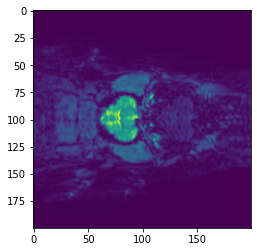

In [18]:
#Pugem imatge nifti
imatge_nib=nib.load(path_nifti)
image=imatge_nib.get_fdata()
plt.imshow(image[:,:,5,45])

In [19]:
nova_imatge=np.zeros((200,200,16,60))

for j in range(0,60):
    for i in range(0,16):
        nova_imatge[:,:,i,j]=image[:,:,i,j]*image_mascara[:,:,i]
        
plt.imshow(nova_imatge[:,:,5,45])

In [21]:
mascarat = nib.nifti1.Nifti1Image(nova_imatge,affine=imatge_nib.affine, header=imatge_nib.header)
nib.save(mascarat, path_new_nifti)

In [22]:
nifti_file=nib.load(path_new_nifti)

In [23]:
nifti_array = nifti_file.get_fdata()
nifti_array= np.rot90(nifti_array,1,axes=(0,1))

In [24]:
for j in range(0,9):
    for i in range(0,16):
        #Dicom_dir ponemos el nombre del dicom original en el que queremos sobreescribir la imagen
        dicom_dir=os.path.join(directory_dicom_crani,name_dicom_final1 + '{b}.{a}.dcm'.format(a=i+1,b=j+1))
        dicom_file = pydicom.dcmread(dicom_dir)
        arr=nifti_array[:,:,i,j]
        arr = arr.astype('uint16')

        dicom_file.Rows = arr.shape[0]
        dicom_file.Columns = arr.shape[1]
        dicom_file.PhotometricInterpretation = "MONOCHROME2"
        dicom_file.SamplesPerPixel = 1
        dicom_file.BitsStored = 16
        dicom_file.BitsAllocated = 16
        dicom_file.HighBit = 15
        dicom_file.PixelRepresentation = 1
        dicom_file.PixelData = arr.tobytes()
        #Nombre del dicom final
        dicom_file.save_as(os.path.join(directory_out, name_dicom_final1 + '{b}.{a}.dcm'.format(a=i+1,b=j+1)))
        
        
for j in range(10,61):
    for i in range(0,16):
            #Nombre del dicom original
            dicom_dir=os.path.join(directory_dicom_crani, name_dicom_final2 + '{b}.{a}.dcm'.format(a=i+1,b=j))
            dicom_file = pydicom.dcmread(dicom_dir)
            arr=nifti_array[:,:,i,j-1]
            arr = arr.astype('uint16')

            dicom_file.Rows = arr.shape[0]
            dicom_file.Columns = arr.shape[1]
            dicom_file.PhotometricInterpretation = "MONOCHROME2"
            dicom_file.SamplesPerPixel = 1
            dicom_file.BitsStored = 16
            dicom_file.BitsAllocated = 16
            dicom_file.HighBit = 15
            dicom_file.PixelRepresentation = 1
            dicom_file.PixelData = arr.tobytes()
            #Nombre del dicom final
            dicom_file.save_as(os.path.join(directory_out, name_dicom_final2 + '{b}.{a}.dcm'.format(a=i+1,b=j)))
